# Sierpiński and other Kronecker Graphs

Kronecker products can be used iteratively to build scale-free fractal graph expansions with very interesting properties.  See [this paper](https://cs.stanford.edu/people/jure/pubs/kronecker-jmlr10.pdf) for a deep mathematical exploration of the subject.

In [1]:
from pygraphblas import *
from pygraphblas.gviz import *

import random
random.seed(44)

# Initiator Graph

Start with a small "initiator" graph matrix with random weights:

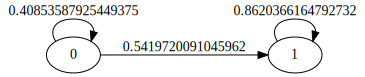

In [2]:
def k(f=random.random):
    N = Matrix.sparse(FP64, 2, 2)
    for e in ([0,0],[0,1],[1,1]):
        N[e] = f()
    return N

K = k()
draw_graph(K)

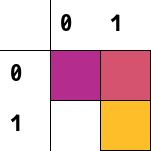

In [3]:
draw_matrix(K, scale=50, labels=True, cmap='plasma')

## Kronecker Power

A "Kronecker power" can be acheived by iteratively multiply the intiator with itself using a [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product).

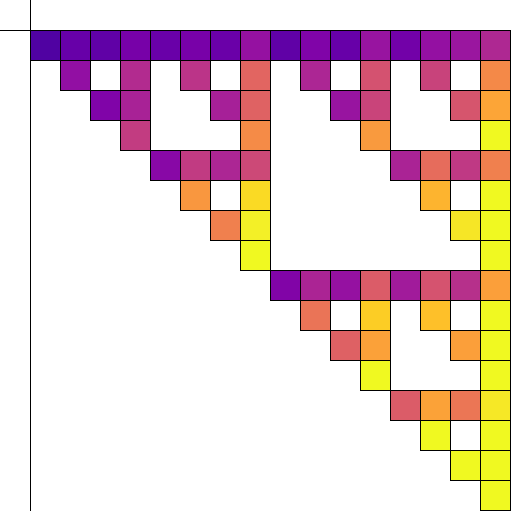

In [4]:
     
@binary_op(FP64)  
def randomize(x, y): 
    return x + x * random.uniform(0.5, y)

def kronprod(K, n):
    for i in range(n):
        K = K.kronecker(K)
        K.apply_second(randomize, 1, out=K)
    return K

K2 = kronprod(K, 2)
draw_matrix(K2, scale=30, cmap='plasma')

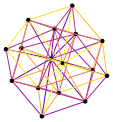

In [19]:
draw_graph(K2.triu(1), show_weight=False, labels=False, node_attr=dict(shape='point'), edge_attr=dict(arrowhead='none'), 
           graph_attr=dict(layout='neato'), edge_cmap='plasma')

## Thresholding

By using `select()` only edges that meet a threshold are kept:

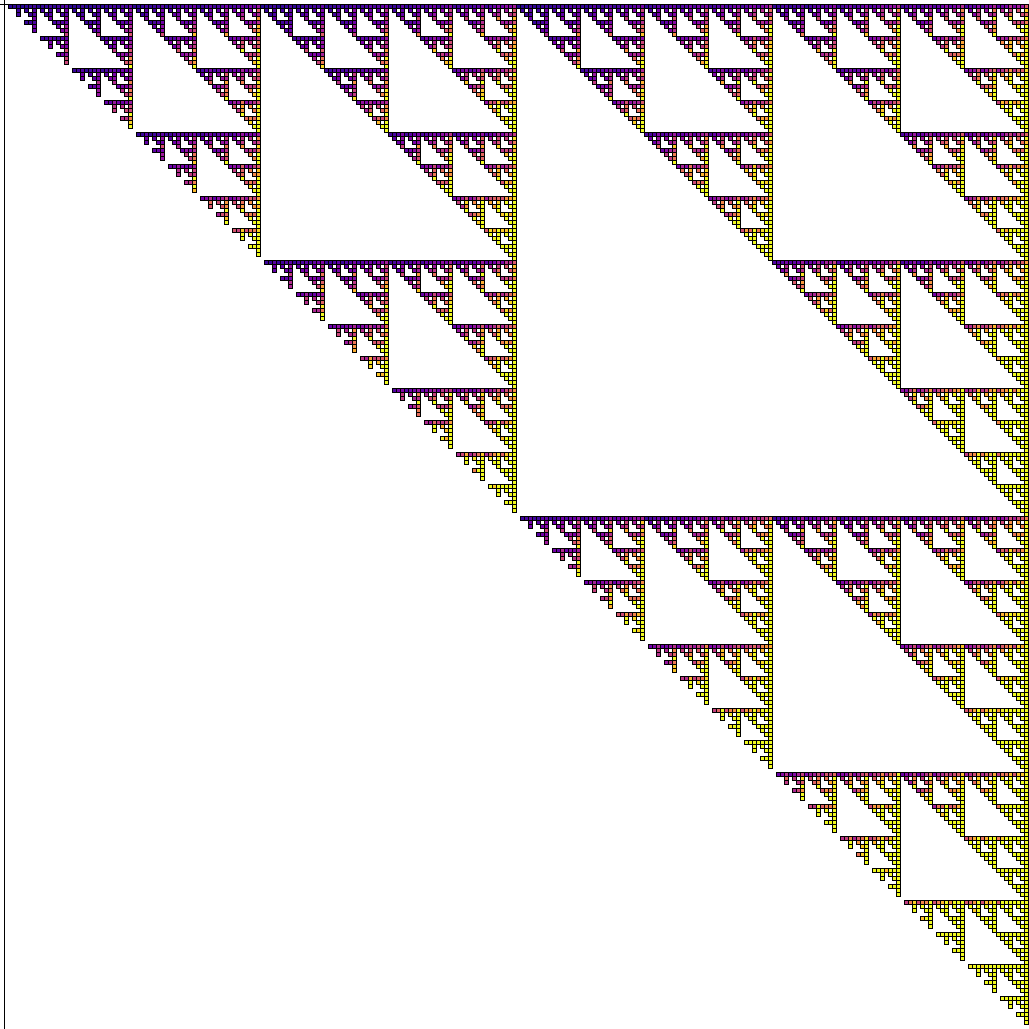

In [6]:
random.seed(42)
K3 = kronprod(K, 3).triu(1)
draw_matrix(K3, scale=4, cmap='plasma')

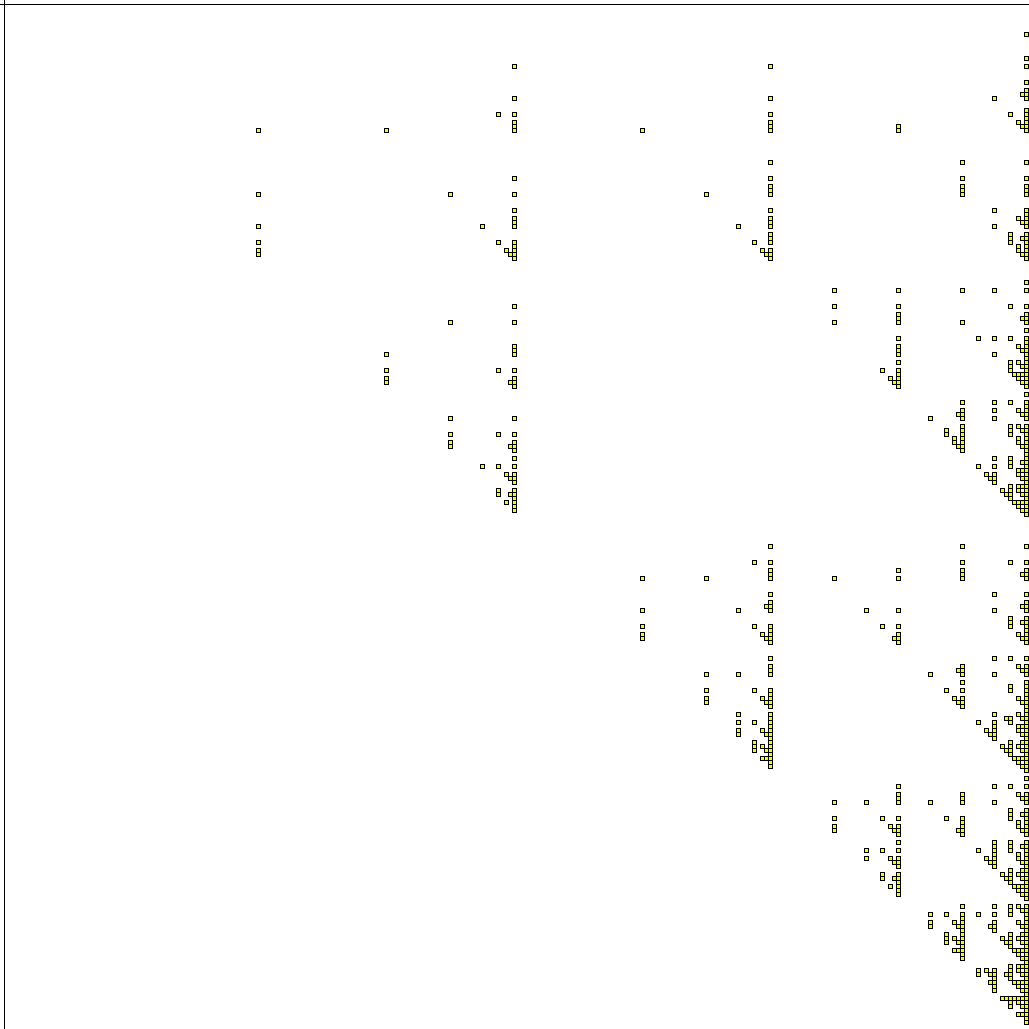

In [7]:
K3 = K3.select('>=', K3.reduce_float()/len(K3)+1)

draw_matrix(K3, scale=4, cmap='plasma')

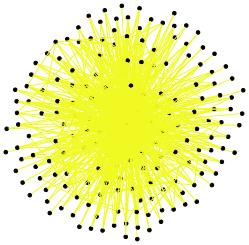

In [8]:
draw_graph(K3.triu(1), edge_cmap='plasma', show_weight=False, labels=False, node_attr=dict(shape='point'), edge_attr=dict(arrowhead='none'), graph_attr=dict(layout='neato'))

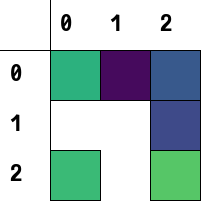

In [9]:
def j(f=random.random):
    N = Matrix.sparse(FP64, 3, 3)
    for e in ([0,0],[0,1],[0,2],[1,2],[2,2],[2,0]):
        N[e] = f()
    return N

draw_matrix(j(), scale=50, labels=True)

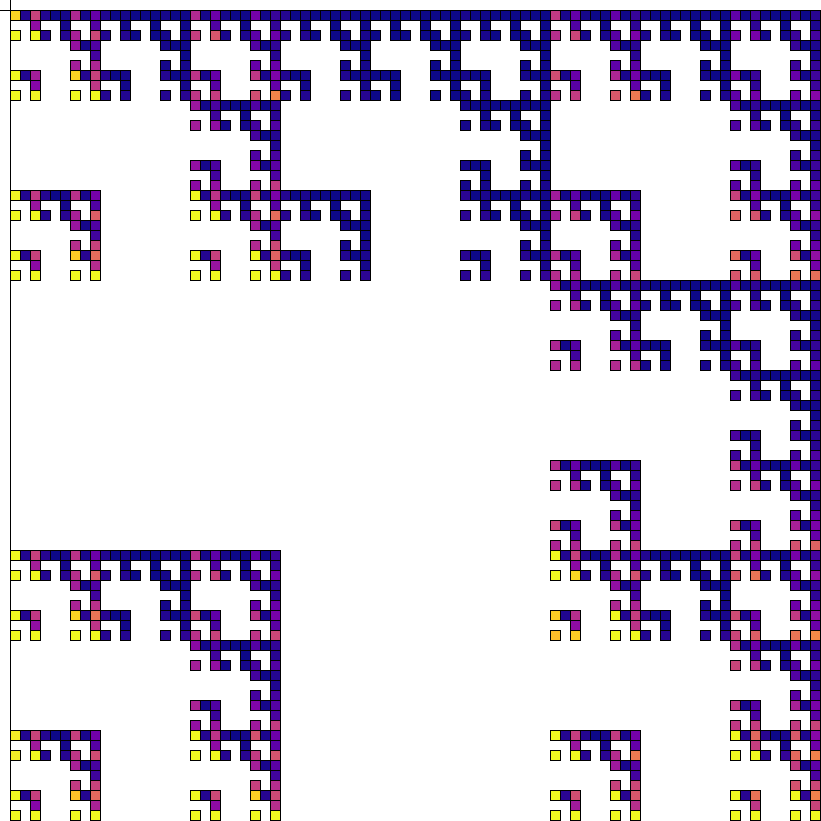

In [10]:
random.seed(42)
K4 = kronprod(j(), 2)
draw_matrix(K4, scale=10, cmap='plasma')

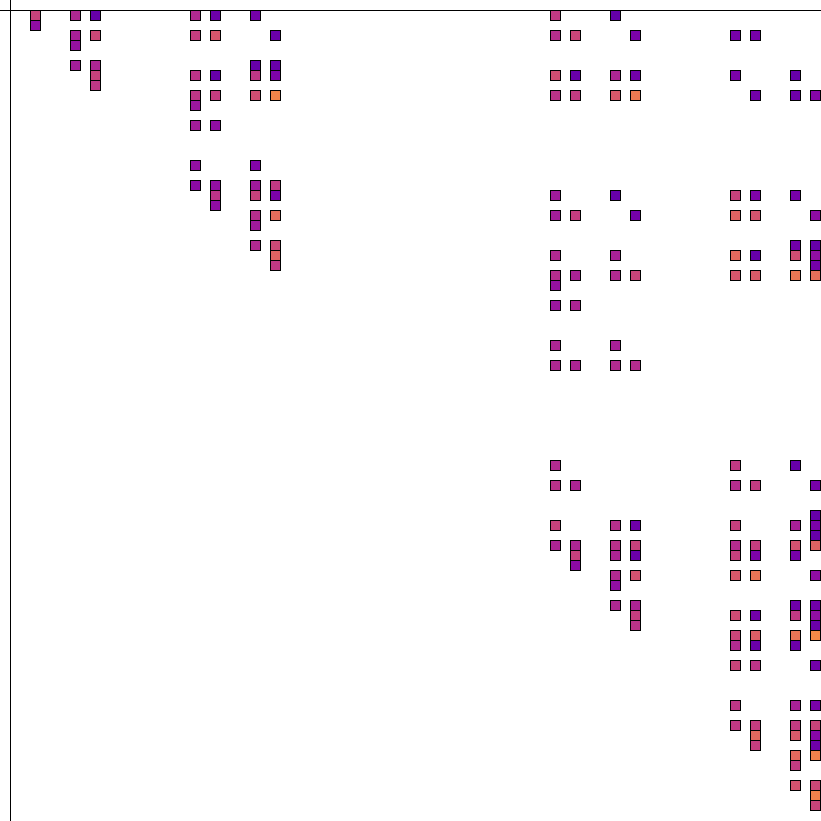

In [11]:
K5 = K4.select('>=', K4.reduce_float()/len(K4)).triu(1)
draw_matrix(K5, scale=10, cmap='plasma')

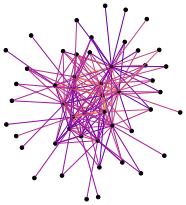

In [22]:
draw_graph(K5, edge_cmap='plasma', show_weight=False, labels=False, node_attr=dict(shape='point'), edge_attr=dict(arrowhead='none'), graph_attr=dict(layout='neato'))

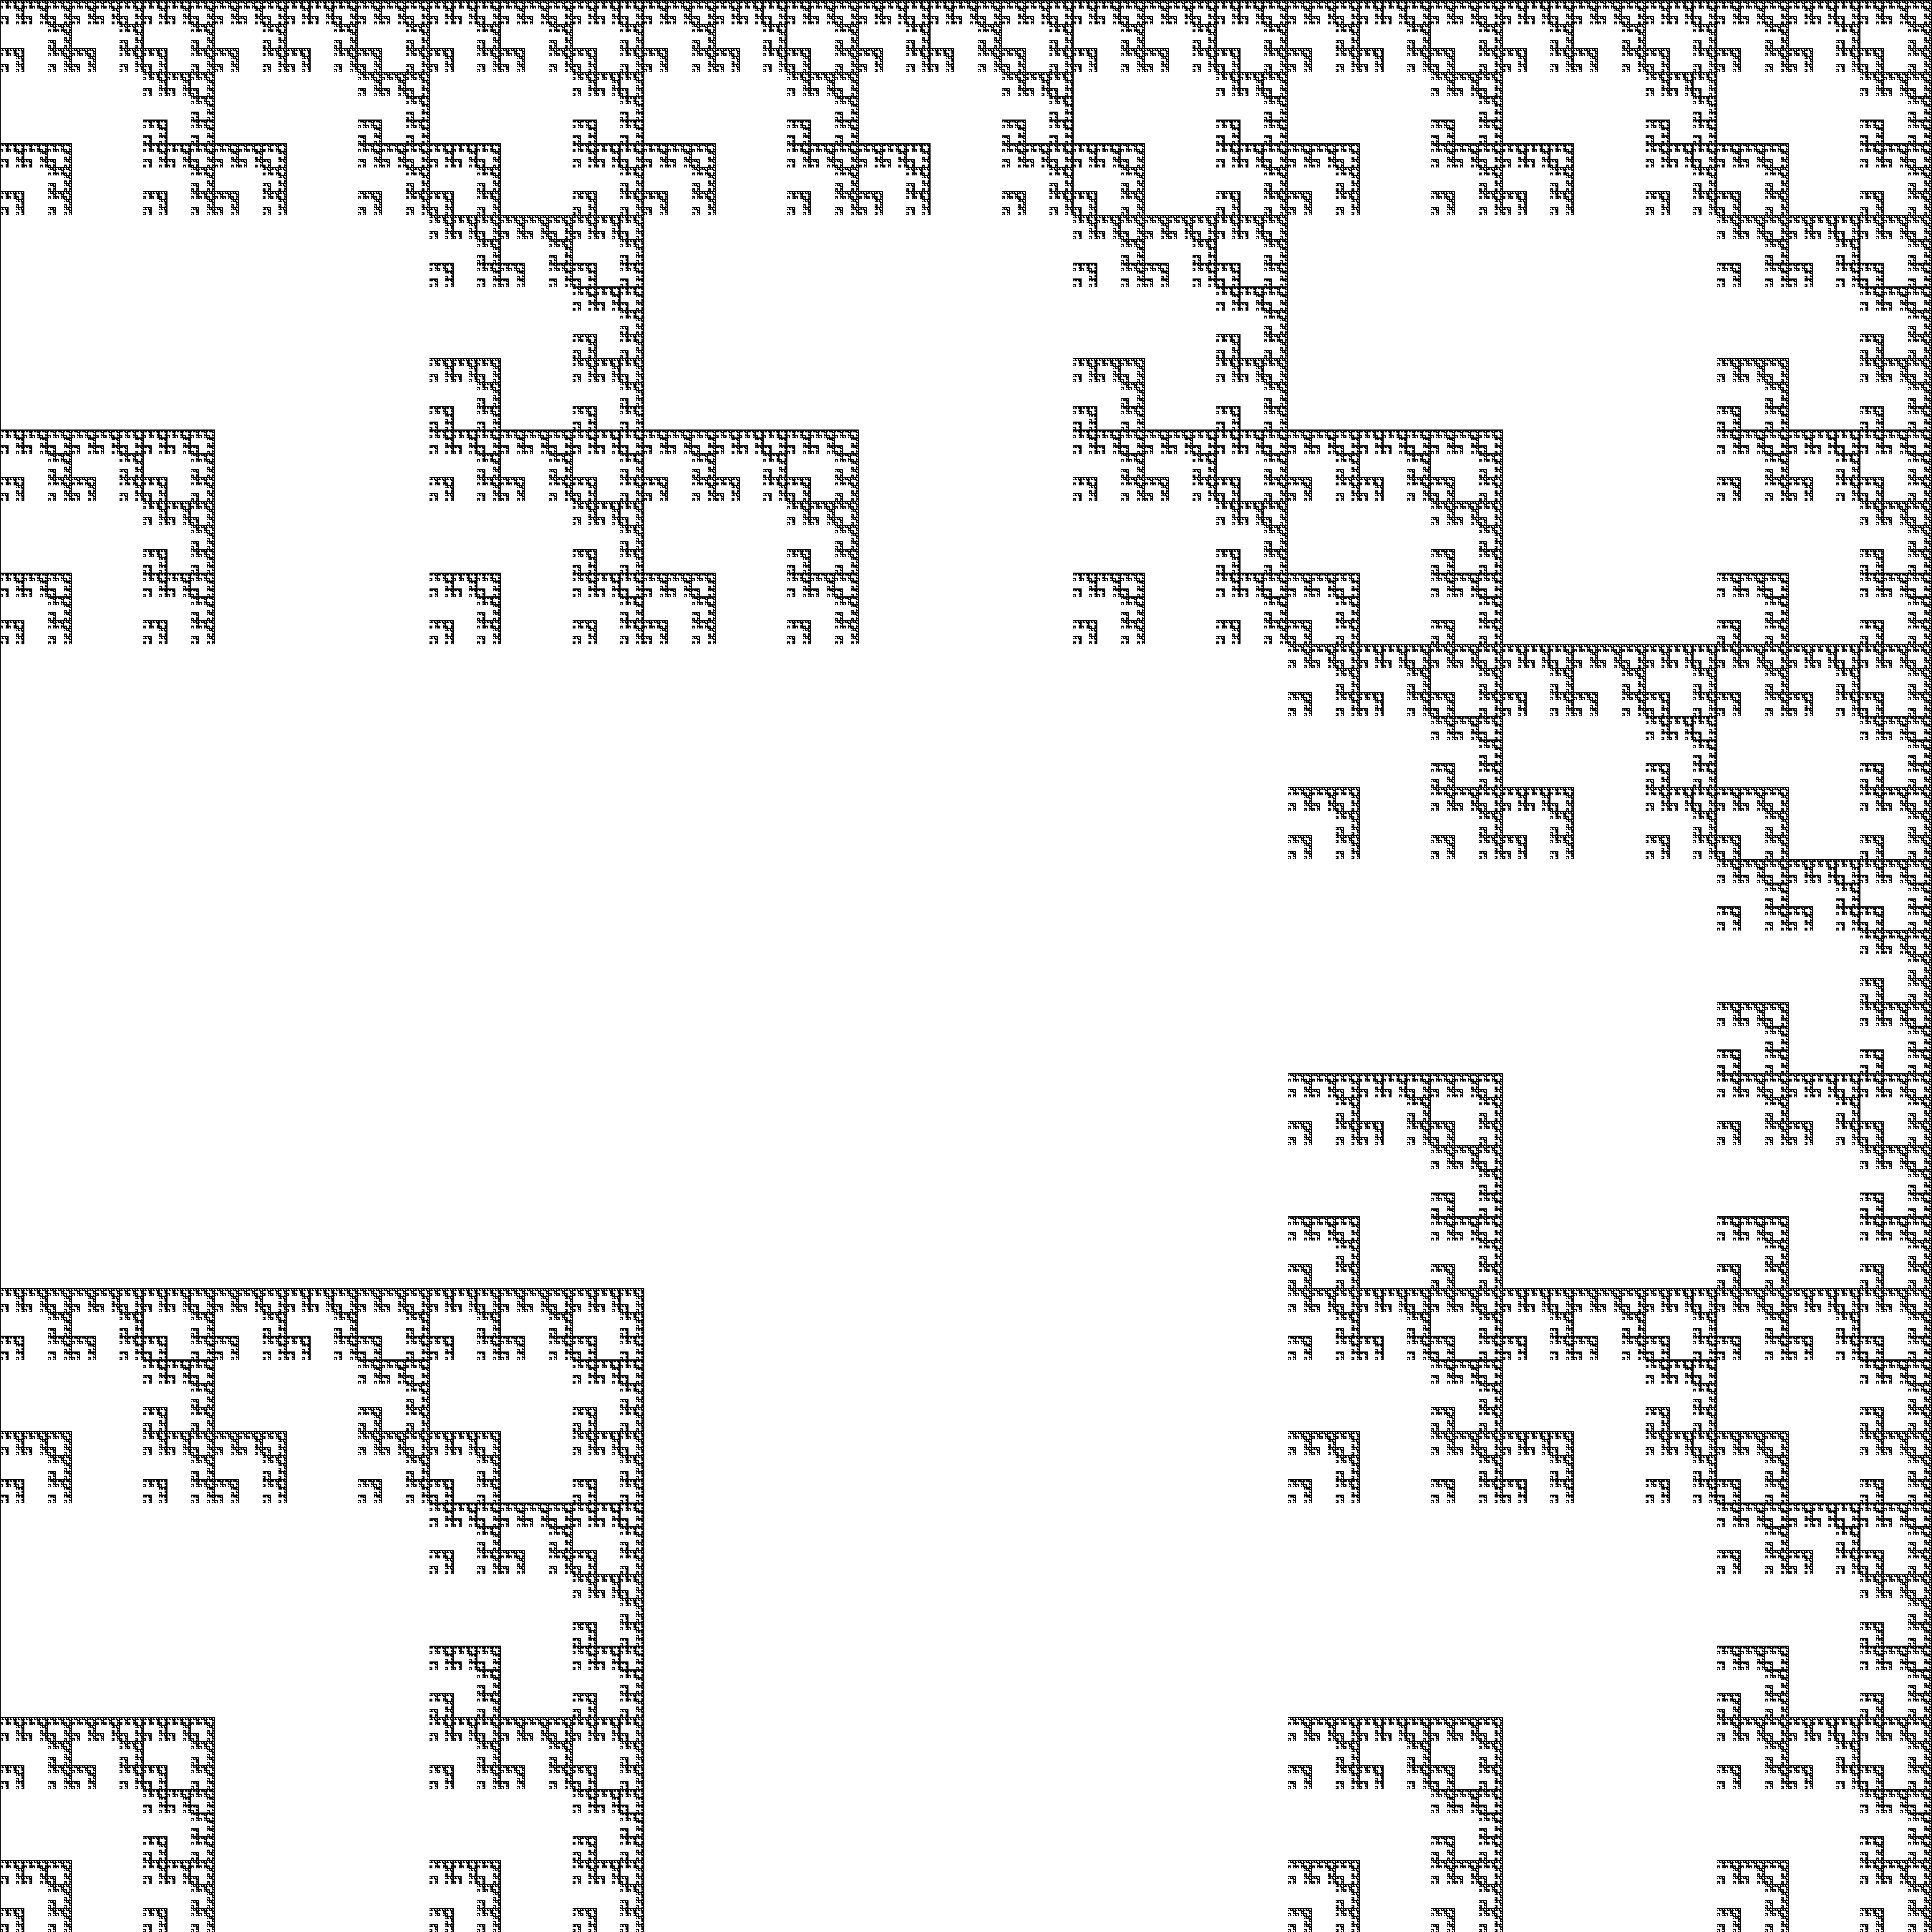

In [27]:
random.seed(42)
K6 = kronprod(j(), 3)
draw_matrix(K6, scale=1, cmap='plasma')